---

#  Dataset Description:

This dataset contains large-scale operational data from a retail and warehouse sales system.
It includes **sales volume**, **transfers**, and **supplier-product information**.
The **goal** is to predict the value of `RETAIL SALES` using machine learning and deep learning models.

---

##  Feature Summary:

| Column Name          | Description                                                                                                                 |
| -------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| **YEAR**             | Year of the sale (e.g., 2021). Represents the time dimension of the transaction.                                            |
| **MONTH**            | Month of the sale (e.g., 3 = March). Used to capture seasonal trends.                                                       |
| **SUPPLIER**         | The name of the company or supplier who provided the product (categorical).                                                 |
| **ITEM CODE**        | Unique identifier for each product. Typically excluded from modeling.                                                       |
| **ITEM DESCRIPTION** | Detailed description of the product (e.g., "Blue T-shirt – Medium"). May contain useful textual info but not used directly. |
| **ITEM TYPE**        | The category/type of the item (e.g., Clothing, Electronics). This is encoded and used in modeling.                          |
| **RETAIL SALES**     |  **Target variable.** The total volume/value of retail sales for the item within the given period.                        |
| **RETAIL TRANSFERS** | Quantity of products transferred between retail outlets. Indicates movement of stock.                                       |
| **WAREHOUSE SALES**  | Quantity of products sold from warehouse to retail stores. Reflects backend inventory flow.                                 |

---

#  Required Libraries

In [4]:
%pip install -r requirements.txt

  Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.8.0-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")




##  Step 1: Data Loading & Exploration

* Displayed first rows and column types
* Identified missing values (none critical)
* Split features into **numerical** and **categorical**


In [6]:
df = pd.read_csv("Data/Warehouse_and_Retail_Sales.csv")


# Initial Exploration

In [7]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [8]:
df.shape

(307645, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [10]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [11]:
df.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              396
ITEM CODE           34056
ITEM DESCRIPTION    34822
ITEM TYPE               8
RETAIL SALES        10674
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4895
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

## Identify Feature Types

In [14]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
Categorical Features: ['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']



---

##  Step 2:  Visualizations 

Created high-quality, presentation-ready plots:

* Histogram + KDE of Retail Sales
* Boxplots by Month, Supplier, and Item Type
* Correlation heatmap
* Monthly and yearly sales trends
* Retail vs Warehouse scatter analysis
* Item Type distributions (bar/pie)

These visuals helped understand seasonality, feature importance, and sales behavior across different attributes.


## Set style

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Histogram of Retail Sales

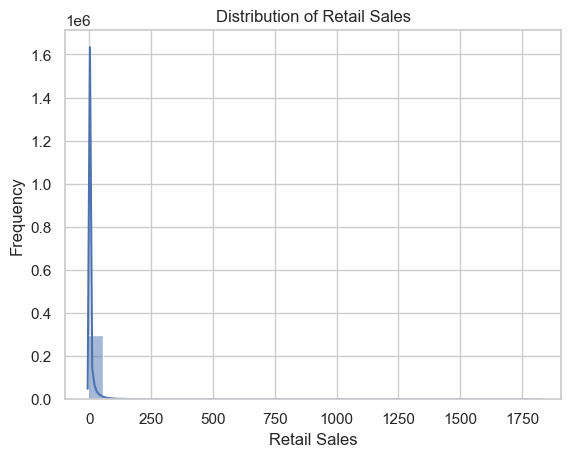

In [16]:
sns.histplot(df["RETAIL SALES"], kde=True, bins=30)
plt.title("Distribution of Retail Sales")
plt.xlabel("Retail Sales")
plt.ylabel("Frequency")
plt.show()

# Boxplot of Retail Sales by Month

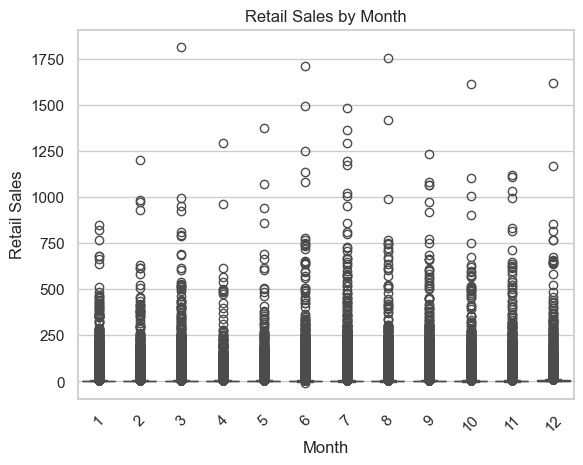

In [17]:
sns.boxplot(data=df, x="MONTH", y="RETAIL SALES")
plt.title("Retail Sales by Month")
plt.xlabel("Month")
plt.ylabel("Retail Sales")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap (for numerical columns)

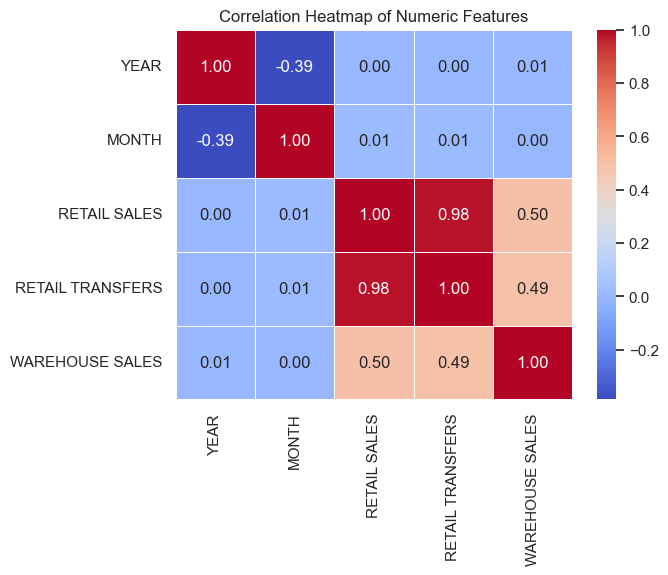

In [18]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Retail Sales by Supplier

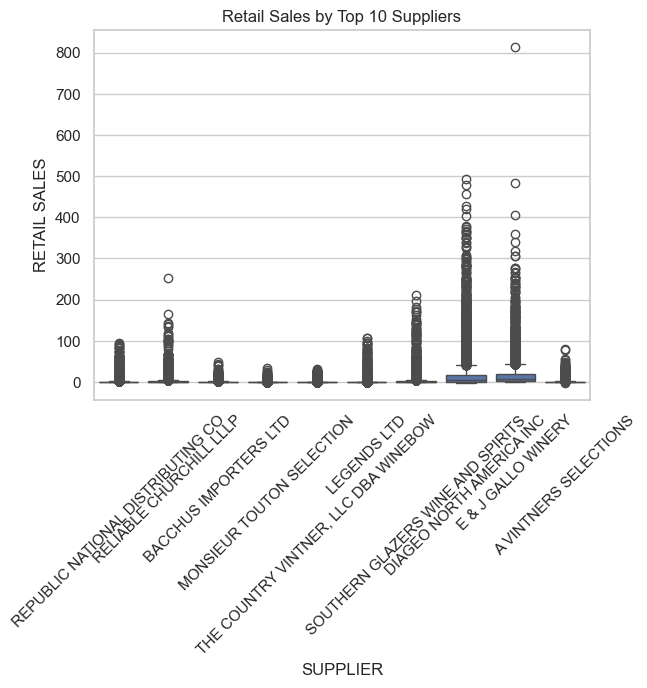

In [19]:
top_suppliers = df["SUPPLIER"].value_counts().head(10).index
sns.boxplot(data=df[df["SUPPLIER"].isin(top_suppliers)], x="SUPPLIER", y="RETAIL SALES")
plt.title("Retail Sales by Top 10 Suppliers")
plt.xticks(rotation=45)
plt.show()

# Count of Item Types

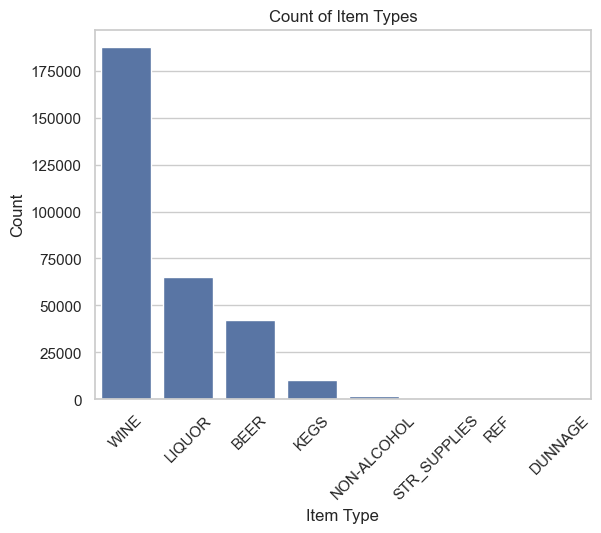

In [20]:
sns.countplot(data=df, x="ITEM TYPE", order=df["ITEM TYPE"].value_counts().index)
plt.title("Count of Item Types")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Retail Sales by Item Type

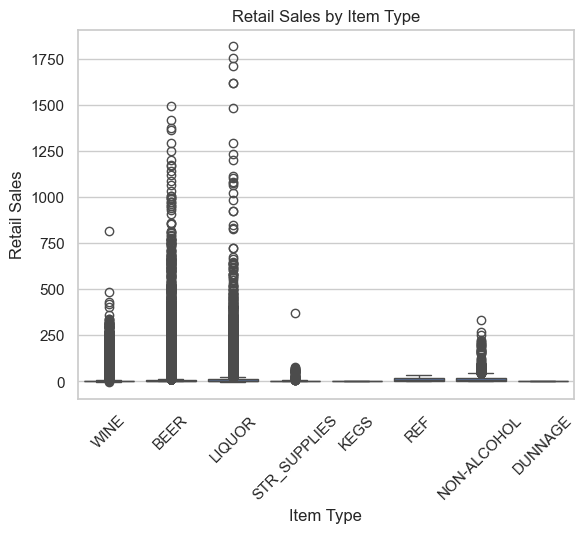

In [21]:
sns.boxplot(data=df, x="ITEM TYPE", y="RETAIL SALES")
plt.title("Retail Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Retail Sales")
plt.xticks(rotation=45)
plt.show()

# Monthly Trend of Retail Sales

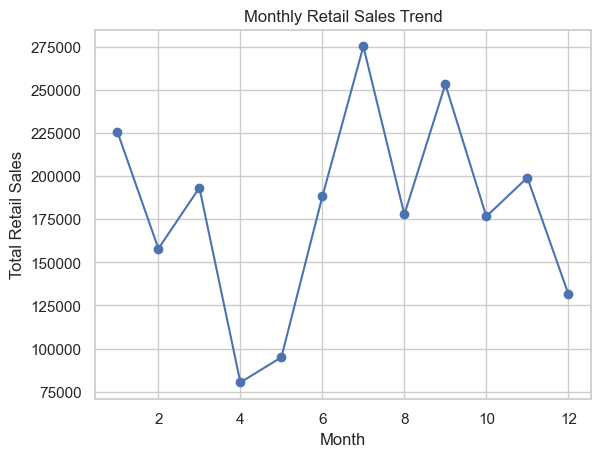

In [22]:
monthly_sales = df.groupby("MONTH")["RETAIL SALES"].sum().sort_index()
monthly_sales.plot(marker='o')
plt.title("Monthly Retail Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Retail Sales")
plt.grid(True)
plt.show()

# Warehouse Sales vs Retail Sales Scatter Plot

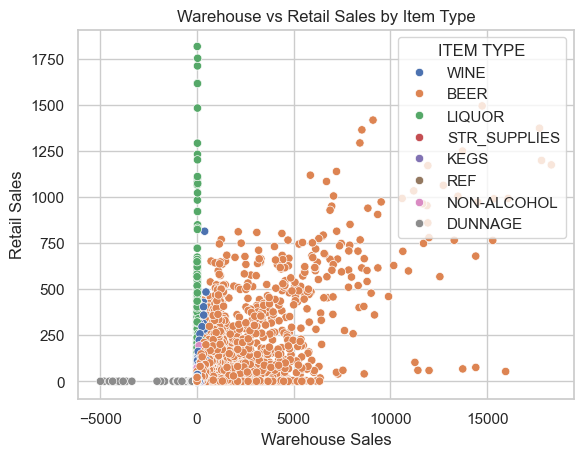

In [23]:
sns.scatterplot(data=df, x="WAREHOUSE SALES", y="RETAIL SALES", hue="ITEM TYPE")
plt.title("Warehouse vs Retail Sales by Item Type")
plt.xlabel("Warehouse Sales")
plt.ylabel("Retail Sales")
plt.show()

# Retail Transfers vs Retail Sales Scatter Plot

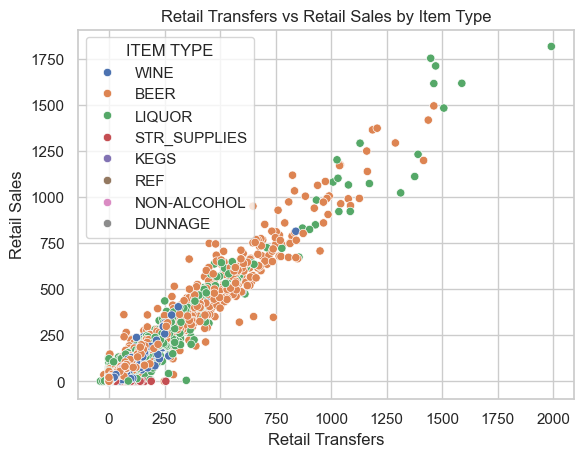

In [24]:
sns.scatterplot(data=df, x="RETAIL TRANSFERS", y="RETAIL SALES", hue="ITEM TYPE")
plt.title("Retail Transfers vs Retail Sales by Item Type")
plt.xlabel("Retail Transfers")
plt.ylabel("Retail Sales")
plt.show()

# Retail Sales by Year

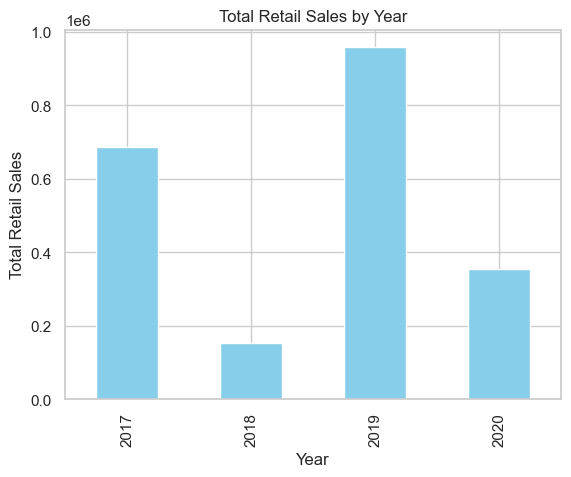

In [25]:
yearly_sales = df.groupby("YEAR")["RETAIL SALES"].sum()
yearly_sales.plot(kind="bar", color="skyblue")
plt.title("Total Retail Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Retail Sales")
plt.show()


---

##  Step 3: Feature Engineering & Preprocessing

* Combined `YEAR` and `MONTH` into structured datetime features
* Encoded categorical values using `LabelEncoder`
* Normalized numerical values using `StandardScaler`
* Prepared `X_train`, `X_test`, `y_train`, `y_test` for model training

---

#  Drop Unnecessary Columns

In [26]:
df_cleaned = df.drop(columns=["ITEM CODE", "ITEM DESCRIPTION"])

# Combine YEAR and MONTH into a single time feature

In [27]:
df_cleaned["YEAR"] = df_cleaned["YEAR"].astype(str)
df_cleaned["MONTH"] = df_cleaned["MONTH"].astype(str)
df_cleaned["DATE"] = pd.to_datetime(df_cleaned["YEAR"] + "-" + df_cleaned["MONTH"] + "-01")
df_cleaned["MONTH_NUM"] = df_cleaned["DATE"].dt.month
df_cleaned["YEAR_NUM"] = df_cleaned["DATE"].dt.year
df_cleaned = df_cleaned.drop(columns=["DATE"])

# Label Encoding for categorical features


In [28]:
le_supplier = LabelEncoder()
le_item_type = LabelEncoder()

df_cleaned["SUPPLIER_ENC"] = le_supplier.fit_transform(df_cleaned["SUPPLIER"])
df_cleaned["ITEM_TYPE_ENC"] = le_item_type.fit_transform(df_cleaned["ITEM TYPE"])



# Remove original string columns

In [29]:
df_cleaned = df_cleaned.drop(columns=["SUPPLIER", "ITEM TYPE"])

# Target: Let’s try to predict RETAIL SALES (Regression)

In [30]:
target = "RETAIL SALES"

# Define features and target

In [31]:
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

#  Scale Numerical Features

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=537)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (245981, 8)
Test shape: (61496, 8)


# Train Optimized ML Regression Models

# Helper to evaluate model

In [34]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    return {
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }


In [35]:
models = [
    ("Linear Regression", LinearRegression())]


# Evaluate all models

In [36]:
results = []
for name, model in models:
    score = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results.append(score)

# Create DataFrame of results

In [37]:
results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
results_df

,Model,MAE,MSE,RMSE,R²
0,Linear Regression,1.709181,38.946418,6.240707,0.957856
